## Loading Dataset--

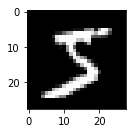

In [2]:
# Importing libraries---
from keras.datasets import mnist
import matplotlib.pyplot as plt

#---------------#

# load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#---------------#

# plotting a sample image as gray scale---
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Importing Libraries-


In [3]:
# Importing neccessary libraries for Model-
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


## Data Preprocessing-

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

#---------------#

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#---------------#

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

#---------------#

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

#---------------#

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Model 1

In [15]:
# DEFINING our model
def our_model1():
    
	# create model---
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
    
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
    
	model.add(Dropout(0.2))
    
	model.add(Flatten())
    
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
    
    
	# Compile model---
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [16]:
# build the model
model = our_model1()

#---------------#

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.3780 - acc: 0.8896 - val_loss: 0.0830 - val_acc: 0.9748
Epoch 2/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.0987 - acc: 0.9699 - val_loss: 0.0534 - val_acc: 0.9814
Epoch 3/10
60000/60000 [==============================] - 30s 499us/step - loss: 0.0721 - acc: 0.9780 - val_loss: 0.0389 - val_acc: 0.9867
Epoch 4/10
60000/60000 [==============================] - 30s 498us/step - loss: 0.0558 - acc: 0.9826 - val_loss: 0.0317 - val_acc: 0.9893
Epoch 5/10
60000/60000 [==============================] - 30s 499us/step - loss: 0.0477 - acc: 0.9855 - val_loss: 0.0334 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0416 - acc: 0.9869 - val_loss: 0.0267 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0384 - acc: 0.9880 - val_loss: 0.

## Accuracy/ Error 1--

In [21]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]))

CNN Accuracy: 0.99%


# Model 2

In [10]:
# DEFINING our model
def our_model2():
    
	# create model---
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
    
	model.add(Dropout(0.2))
    
	model.add(Flatten())
    
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
    
    
	# Compile model---
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [12]:
# build the model
model = our_model2()

#---------------#

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=300)

#---------------#

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 25s 409us/step - loss: 0.3619 - acc: 0.8965 - val_loss: 0.1194 - val_acc: 0.9655
Epoch 2/3
60000/60000 [==============================] - 25s 414us/step - loss: 0.1037 - acc: 0.9705 - val_loss: 0.0691 - val_acc: 0.9780
Epoch 3/3
60000/60000 [==============================] - 25s 424us/step - loss: 0.0703 - acc: 0.9789 - val_loss: 0.0472 - val_acc: 0.9848
CNN Error: 1.52%


## Accuracy/ Error 2--

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]))

CNN Accuracy: 0.98%


#### -------RESULT-------

## Here the second model is not optimized as we are not extracting features properly and due to this it is giving less accuracy. Here batch size, layers and epochs are not optimized.

In [ ]:
# Thank you